# Read Datasets / Lê as bases de dados

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix

In [ ]:
df_train_smote = pd.read_csv('https://raw.githubusercontent.com/Muniz97/Yellow-fever-Febre-Amarela/main/3%20-%20Preprocessing/train_base_smote.csv')
df_train_smote.head()

,UF_LPI,SEXO,IDADE,MES_IS,ANO_IS,DIA_IS,OBITO
0,0.563534,0.398870,-1.182366,-0.571812,-0.004675,1.540279,1
1,0.350289,0.398870,1.592348,-0.571812,0.491140,0.582164,0
2,0.352941,0.259259,0.868510,-0.571812,0.491140,-0.735243,1
3,0.563534,0.398870,-0.398208,-0.216773,-2.483752,-0.495715,0
4,0.350427,0.259259,0.144671,-0.216773,0.491140,0.103107,1


In [ ]:
df_train_smote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2648 entries, 0 to 2647
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UF_LPI  2648 non-null   float64
 1   SEXO    2648 non-null   float64
 2   IDADE   2648 non-null   float64
 3   MES_IS  2648 non-null   float64
 4   ANO_IS  2648 non-null   float64
 5   DIA_IS  2648 non-null   float64
 6   OBITO   2648 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 144.9 KB


In [ ]:
df_train_smote.describe()

,UF_LPI,SEXO,IDADE,MES_IS,ANO_IS,DIA_IS,OBITO
count,2648.000000,2648.000000,2648.000000,2648.000000,2648.000000,2648.000000,2648.000000
mean,0.373372,0.377835,0.044430,0.051768,-0.031016,0.007051,0.500000
std,0.055621,0.048935,0.995638,1.049432,1.027416,1.018719,0.500094
min,0.302130,0.259259,-2.569724,-0.571812,-3.310111,-1.693358,0.000000
25%,0.350289,0.398870,-0.639487,-0.571812,0.325868,-0.855008,0.000000
50%,0.350566,0.398870,0.084351,-0.216773,0.467222,-0.016657,0.500000
75%,0.352941,0.398870,0.747870,0.138266,0.491140,0.821693,1.000000
max,0.573271,0.398870,3.040026,3.333614,0.986956,1.899571,1.000000


In [ ]:
df_test = pd.read_csv('https://raw.githubusercontent.com/Muniz97/Yellow-fever-Febre-Amarela/main/3%20-%20Preprocessing/test_base.csv')
df_test.head()

,UF_LPI,SEXO,IDADE,MES_IS,ANO_IS,DIA_IS,OBITO
0,0.350289,0.39887,0.989149,-0.216773,0.49114,-0.375950,0
1,0.350289,0.39887,0.325631,-0.216773,0.49114,0.701928,0
2,0.352941,0.39887,-0.518848,-0.571812,0.49114,1.180986,0
3,0.352941,0.39887,0.446270,-0.216773,0.49114,-0.016657,1
4,0.352941,0.39887,-0.337888,-0.571812,0.49114,-0.974772,0


In [ ]:
x_train = df_train_smote.iloc[:, :-1]
y_train = df_train_smote['OBITO']

In [ ]:
x_test = df_test.iloc[:,:-1]
y_test = df_test['OBITO']

# K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors= 3, metric= 'euclidean')

In [ ]:
model_knn.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [ ]:
knn_predict = model_knn.predict(x_test)

<Axes: >

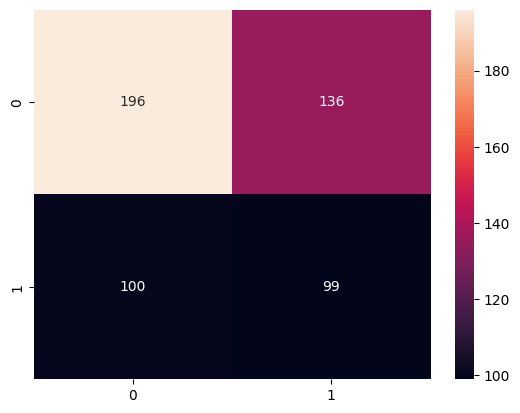

In [ ]:
sns.heatmap(confusion_matrix(y_test,knn_predict), annot = True, fmt = '.0f')

In [ ]:
print(f'Accuracy: {accuracy_score(y_test,knn_predict):.2f}')
print(f'Precision: {precision_score(y_test,knn_predict):.2f}')
print(f'Recall score: {recall_score(y_test,knn_predict):.2f}')
print(f'F1-score: {f1_score(y_test,knn_predict):.2f}')

Accuracy: 0.56
Precision: 0.42
Recall score: 0.50
F1-score: 0.46


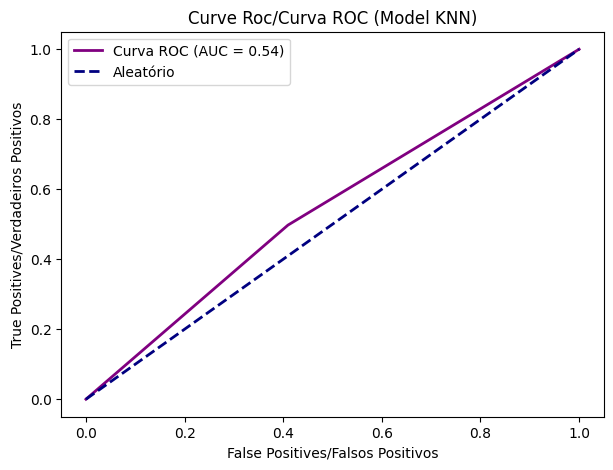

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,knn_predict)
roc_curve(y_test,knn_predict)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='purple', lw=2, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle= '--', label='Aleatório')
plt.xlabel('False Positives/Falsos Positivos')
plt.ylabel('True Positives/Verdadeiros Positivos')
plt.title('Curve Roc/Curva ROC (Model KNN)')
plt.legend()
plt.show()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_random = RandomForestClassifier(n_estimators= 200, random_state= 1337, criterion= 'gini')

In [ ]:
model_random.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=1337)

In [ ]:
random_predict = model_random.predict(x_test)

<Axes: >

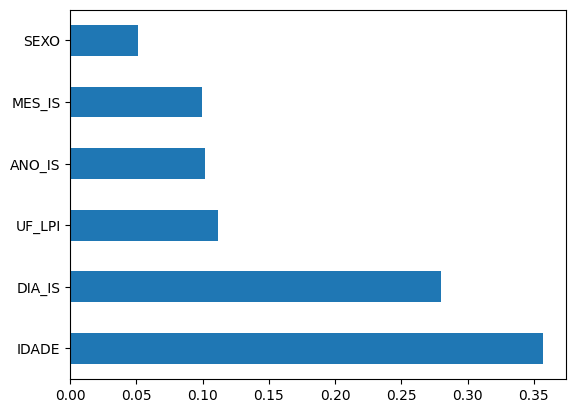

In [ ]:
feat_importances = pd.Series(model_random.feature_importances_, index = x_train.columns)
feat_importances.nlargest(6).plot(kind = 'barh')

<Axes: >

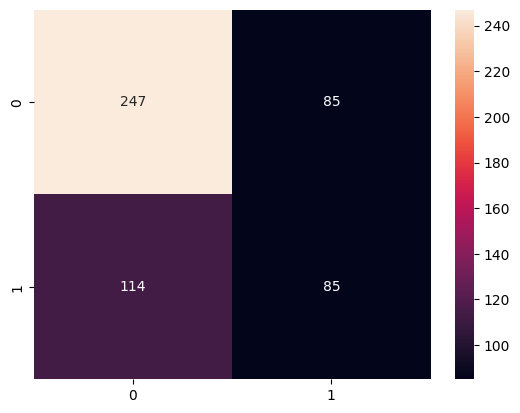

In [ ]:
sns.heatmap(confusion_matrix(y_test,random_predict), annot = True, fmt = '.0f')

In [ ]:
print(f'Accuracy: {accuracy_score(y_test,random_predict):.2f}')
print(f'Precision: {precision_score(y_test,random_predict):.2f}')
print(f'Recall score: {recall_score(y_test,random_predict):.2f}')
print(f'F1-score: {f1_score(y_test,random_predict):.2f}')

Accuracy: 0.63
Precision: 0.50
Recall score: 0.43
F1-score: 0.46


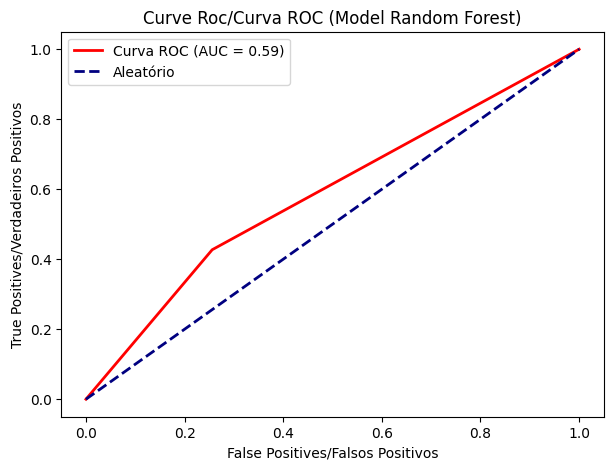

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,random_predict)
roc_curve(y_test,random_predict)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='red', lw=2, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aleatório')
plt.xlabel('False Positives/Falsos Positivos')
plt.ylabel('True Positives/Verdadeiros Positivos')
plt.title('Curve Roc/Curva ROC (Model Random Forest)')
plt.legend()
plt.show()

# Naïve Bayes - Bernoulli

In [ ]:
from sklearn.naive_bayes import BernoulliNB

In [ ]:
np.median(x_train)

0.3502890173410404

In [ ]:
model_bnb = BernoulliNB(binarize=0.35)

In [ ]:
model_bnb.fit(x_train,y_train)

BernoulliNB(binarize=0.35)

In [ ]:
bnb_predict = model_bnb.predict(x_test)

<Axes: >

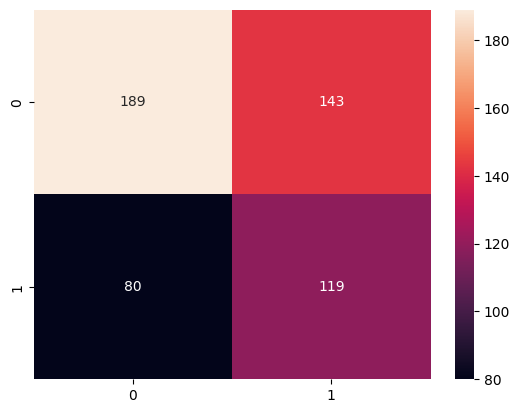

In [ ]:
sns.heatmap(confusion_matrix(y_test,bnb_predict), annot = True, fmt = '.0f')

In [ ]:
print(f'Accuracy: {accuracy_score(y_test,bnb_predict):.2f}')
print(f'Precision: {precision_score(y_test,bnb_predict):.2f}')
print(f'Recall score: {recall_score(y_test,bnb_predict):.2f}')
print(f'F1-score: {f1_score(y_test,bnb_predict):.2f}')

Accuracy: 0.58
Precision: 0.45
Recall score: 0.60
F1-score: 0.52


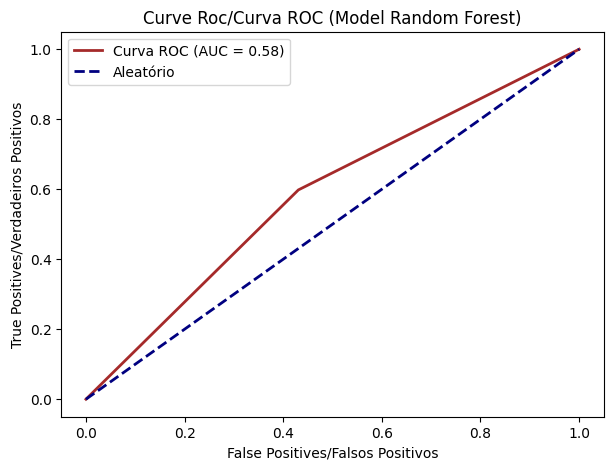

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,bnb_predict)
roc_curve(y_test,bnb_predict)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='brown', lw=2, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aleatório')
plt.xlabel('False Positives/Falsos Positivos')
plt.ylabel('True Positives/Verdadeiros Positivos')
plt.title('Curve Roc/Curva ROC (Model Random Forest)')
plt.legend()
plt.show()

# Select Features

In [ ]:
from sklearn.feature_selection import RFECV

In [ ]:
rfecv_select = RFECV(estimator = model_random,
                     cv = 4,
                     step = 1,
                     scoring = 'f1'
                     )

In [ ]:
rfecv_select

RFECV(cv=4,
      estimator=RandomForestClassifier(n_estimators=200, random_state=1337),
      scoring='f1')

In [ ]:
rfecv_select.fit(x_train, y_train)

RFECV(cv=4,
      estimator=RandomForestClassifier(n_estimators=200, random_state=1337),
      scoring='f1')

In [ ]:
x_train_rfecv = rfecv_select.transform(x_train)
x_test_rfecv = rfecv_select.transform(x_test)

In [ ]:
model_random.fit(x_train_rfecv,y_train)

RandomForestClassifier(n_estimators=200, random_state=1337)

In [ ]:
random_predict_rfecv = model_random.predict(x_test_rfecv)

In [ ]:
print(f'Accuracy: {accuracy_score(y_test,random_predict_rfecv):.2f}')
print(f'Precision: {precision_score(y_test,random_predict_rfecv):.2f}')
print(f'Recall score: {recall_score(y_test,random_predict_rfecv):.2f}')
print(f'F1-score: {f1_score(y_test,random_predict_rfecv):.2f}')

Accuracy: 0.63
Precision: 0.50
Recall score: 0.43
F1-score: 0.46


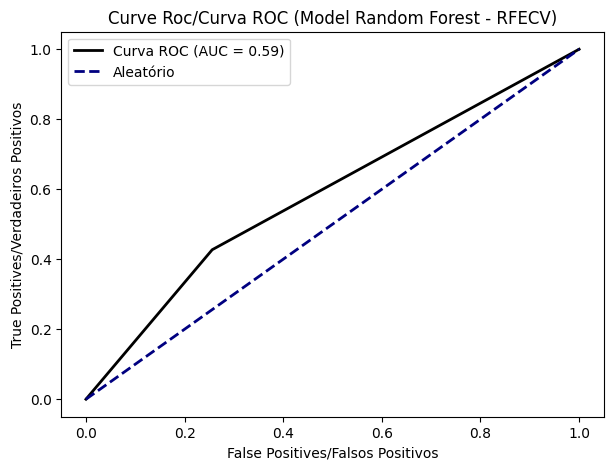

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,random_predict_rfecv)
roc_curve(y_test,random_predict_rfecv)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='black', lw=2, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aleatório')
plt.xlabel('False Positives/Falsos Positivos')
plt.ylabel('True Positives/Verdadeiros Positivos')
plt.title('Curve Roc/Curva ROC (Model Random Forest - RFECV)')
plt.legend()
plt.show()